Plot the tuning curve of vgg_gender for different level morph face.

Now loading batch 1
Now loading batch 2
Now loading batch 3
Now loading batch 4
Now loading batch 5
Now loading batch 6
Now loading batch 7
Now loading batch 8
Now loading batch 9
Now loading batch 10
Now loading batch 11
Testing complete in 0m 5s


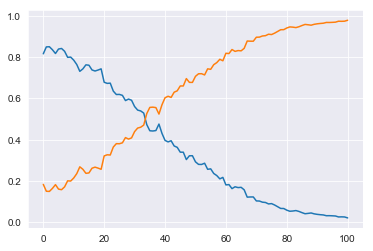

In [17]:
import numpy as np
import seaborn as sns

import torch
from torchvision import transforms
from dnnbrain.dnn.io import PicDataset, DataLoader
from cnnface.dnn.vgg_identity_recons import Vgg_identity
from cnnface.dnn.dnn_output import dnn_ouput
import matplotlib.pyplot as plt

#load model and data
vggid = Vgg_identity()
vggid.load_state_dict(torch.load('F:/Code/pretrained_model/vgg_emotion_CrossEntro.pth'))  # load model

imgcsv_path =  r'D:\cnnface\Emotion_analysis/morphface.csv'
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
PicSet = PicDataset(imgcsv_path, transform)
Picloader = DataLoader(PicSet, batch_size=10,shuffle=False)

# get activation
label, label_prob, dnn_act = dnn_ouput(Picloader,vggid)

sns.set_style('darkgrid')
x = np.arange(0,101,1)
y1 = label_prob[:,0]
y2= label_prob[:,1]
sns.lineplot(x=x,y=y1)
sns.lineplot(x=x,y=y2)
plt.show()

In [26]:
print(y1[30:40])
print(y1[34])
print(y2[34])

[0.5607421  0.54359186 0.5394952  0.5290848  0.4731296  0.44334537
 0.44220003 0.4443532  0.47579584 0.43039665]
0.4731296
0.52687037


In [29]:
from cnnface.stimulus.Image_processing import img2gray

img2gray('D:\cnnface\Emotion_analysis\morphface/frame035.png','D:\cnnface\Emotion_analysis/face_template/baseface.jpg')